# Credit Card Fraud Detection with R - IIMK BDM - Capstone Project

1.   Reading Data
2.   Data Preparation
3.   Data Cleaning
4.   EDA
    > No of Frauds vs Non Frauds

    > Frauds vs NF per Gender M / F

    > Fraud by which category most

    > Top 10 Fraud cases by amount

    > Top 10 Location wise Fraud cases   

5.   Univariate Analysis

    > Distrbution Plot of Target column
        - (Skewness & Kurtosis)

    > Dist plot of Amount

    > Time Bucket Anomoly Detection
      

6.   Bi-Variate Analysis

    > Facet Box Plot of Fraud vs Non Fraud block

    > Year vs Frauds - see if they rose or declined
    
    > Job vs Class - to see any specifc job type target by fraudsters


7.   Class Imbalance 
8.   Independent vs Dependent Variables Test
9.   Data Split
10.  Modeling - Logistic Regression
11.  Modeling - Randon Forest
12.  Model Comparison
13.  Cross Validation
14.  Cost Benefit Analysis    




Getting the data set files into Colab session from Google Drive


---



In [ ]:
#https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497 method 2, runtime is R
#This should work, but it did not for me. More info at the link below. Did not work in full but got close. 
#https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497
#install.packages("googledrive")
#library("googledrive")
#drive_auth(
#  email = gargle::gargle_oauth_email(),
#  path = NULL,
#  scopes = "https://www.googleapis.com/auth/drive",
#  cache = gargle::gargle_oauth_cache(),
#  use_oob = gargle::gargle_oob_default(),
#  token = NULL
R.version.string

[1] "R version 4.1.2 (2021-11-01)"

# Gathering the Dataset into Colab

In [ ]:
install.packages("googledrive") #only need to install occasionally
install.packages("httpuv")
library("googledrive")
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘promises’, ‘later’




In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may need to update python version occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [ ]:
  drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWg4AHRdY1Fdq811bLySWCnlIDdMSW8iT-aocV3Au0xIrGH6iKFrtdY


In [ ]:
getwd()

[1] "/content"

# Copying Dataset from Google drive into Colab

In [ ]:
library(readr)
#drive_find(n_max=10) #looking the files in the google drive

In [ ]:
x <- drive_get("~/Dataset/fraudTrain.csv")
y <- drive_get("~/Dataset/creditcard.csv")
drive_download(x)
drive_download(y)
#z <- read.csv("/content/creditcard.csv",overwrite =T)






✔ The input `path` resolved to exactly 1 file.





✔ The input `path` resolved to exactly 1 file.

File downloaded:

• fraudTrain.csv <id: 12Kz4D2irWVwVFWdcEmHTOmhw3knIMdlI>

Saved locally as:

• fraudTrain.csv

File downloaded:

• creditcard.csv <id: 1eb-pcz-FeWbbSgdYZVIUjINEp-b5If5V>

Saved locally as:

• creditcard.csv



# Reading Dataset into Colab Notebook

In [ ]:
Data <- read.csv("/content/fraudTrain.csv", stringsAsFactors = F)
ModelData <- read.csv("/content/creditcard.csv", stringsAsFactors = F)
head(Data,3)
head(ModelData,3)

,X,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
1,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,⋯,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0
2,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,⋯,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0
3,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,⋯,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.359807,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.01830678,0.2778376,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.191857,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.22577525,-0.6386720,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.358354,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.24799815,0.7716794,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0


# Loading Required Packages & libraries

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘matrixStats’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’




In [ ]:
install.packages('caTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
install.packages('rpart')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('forcats')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
path <- drive_get("~/Package/DMwR_0.4.1.tar.gz")
drive_download(path)





✔ The input `path` resolved to exactly 1 file.

File downloaded:

• DMwR_0.4.1.tar.gz <id: 1hZVOiD8HsBJkEETxh-MPt-953-uI7KeR>

Saved locally as:

• DMwR_0.4.1.tar.gz



In [ ]:
install.packages( "/content/DMwR_0.4.1.tar.gz", repos=NULL, type="source" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("/content/DMwR_0.4.1.tar.gz", repos = NULL, :
“installation of package ‘/content/DMwR_0.4.1.tar.gz’ had non-zero exit status”


In [ ]:
install.packages('abind')
install.packages('zoo')
install.packages('xts')
install.packages('quantmod')
install.packages('ROCR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caTools)
library(rpart)
library(rpart.plot)
library(dplyr)
library(forcats)

In [ ]:
install.packages("ROSE")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(bitops)
library(abind)
library(zoo)
library(xts)
library(quantmod)
library(ROCR)
library(ROSE)

In [ ]:
install.packages("lattice")
install.packages("grid")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”


In [ ]:
library("DMwR")

ERROR: ignored

In [ ]:
# Lets read the Credit Card dataset
#/creditcard.csv
#Data <- read.csv("/fraudTrain.csv", stringsAsFactors = F)
#ModelData <- read.csv("/creditcard.csv", stringsAsFactors = F)
head(Data,3)
head(ModelData,3)

,X,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
1,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,⋯,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0
2,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,⋯,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0
3,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,⋯,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.359807,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.01830678,0.2778376,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.191857,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.22577525,-0.6386720,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.358354,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.24799815,0.7716794,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0


# Data Preparation

In [ ]:
Data=Data[-1] #Removing first column as it has no logical correlation
head(Data,3)# Let's check for any missing values in the data
colSums(is.na(Data))#Checking for na 
apply(is.na(Data),2,sum) # removes na to add sum

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
1,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,⋯,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0
2,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,⋯,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0
3,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,⋯,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0


trans_date_trans_time                cc_num              merchant 
                    0                     0                     0 
             category                   amt                 first 
                    0                     0                     0 
                 last                gender                street 
                    0                     0                     0 
                 city                 state                   zip 
                    0                     0                     0 
                  lat                  long              city_pop 
                    0                     0                     0 
                  job                   dob             trans_num 
                    0                     0                     0 
            unix_time             merch_lat            merch_long 
                    0                     0                     0 
             is_fraud 
                    0

trans_date_trans_time                cc_num              merchant 
                    0                     0                     0 
             category                   amt                 first 
                    0                     0                     0 
                 last                gender                street 
                    0                     0                     0 
                 city                 state                   zip 
                    0                     0                     0 
                  lat                  long              city_pop 
                    0                     0                     0 
                  job                   dob             trans_num 
                    0                     0                     0 
            unix_time             merch_lat            merch_long 
                    0                     0                     0 
             is_fraud 
                    0

In [ ]:
head(ModelData,3)# Let's check for any missing values in the data
colSums(is.na(ModelData))#Checking for na 
apply(is.na(ModelData),2,sum) # removes na to add sum

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.359807,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.01830678,0.2778376,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.191857,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.22577525,-0.6386720,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.358354,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.24799815,0.7716794,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0


Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

Time     V1     V2     V3     V4     V5     V6     V7     V8     V9    V10 
     0      0      0      0      0      0      0      0      0      0      0 
   V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21 
     0      0      0      0      0      0      0      0      0      0      0 
   V22    V23    V24    V25    V26    V27    V28 Amount  Class 
     0      0      0      0      0      0      0      0      0

# Exploratory Data Analysis - Understanding the dataset

In [ ]:
#Understanding the dataset

# check how many entries for fraud and non fraud
data_fraud = Data[which(Data$is_fraud == 1),]
print (nrow(data_fraud)) #Overall Fraud transactions happened 7506
data_notfraud = Data[which(Data$is_fraud == 0),]
print (nrow(data_notfraud)) # Overal Non Fraud transactions happened 1289169
print (nrow(Data)) #Total transactions 1296675

# % split of fraud/non fraud records amount to 99.42% vs 0.058%
prop.table(table(Data$is_fraud)) #99.42% vs 0.058%

[1] 7506
[1] 1289169
[1] 1296675



          0           1 
0.994211348 0.005788652 

In [ ]:
#The above shows that data is highly imbalanced

In [ ]:
#check fraud and non fraud cases groupby gender
men_notfraud = nrow(Data[which(Data$is_fraud == 0 & Data$gender == "M"),]) # 583041
women_notfraud = nrow(Data[which(Data$is_fraud == 0 & Data$gender == "F"),]) #706128
men_fraud = nrow(Data[which(Data$is_fraud == 1 & Data$gender == "M"),]) # 3771
women_fraud = nrow(Data[which(Data$is_fraud == 1 & Data$gender == "F"),]) # 3735


In [ ]:
# % of men who frauded
men_fraud_percent = (men_fraud/(men_notfraud + men_fraud))*100
print (men_fraud_percent) #0.64%

# % of women who frauded
women_fraud_percent = 100 * women_fraud/(women_notfraud + women_fraud)
print (women_fraud_percent) #0.52%

#Find the max and top ten fraud cases transaction amount
(top_n(data_fraud, 10, data_fraud$amt))$amt   
max(data_fraud$amt)#1376.04

#Find the average fraud amount per category. 
table(data_fraud$category)
aggregate(data_fraud$amt, list(data_fraud$category), mean)
aggregate(data_fraud$amt, list(data_fraud$category), median) # It is mostly same for mean and median

[1] 0.6426249
[1] 0.5261579


[1] 1334.07 1292.21 1371.81 1289.89 1313.18 1294.83 1289.07 1324.80 1312.98
[10] 1376.04

[1] 1376.04


 entertainment    food_dining  gas_transport    grocery_net    grocery_pos 
           233            151            618            134           1743 
health_fitness           home      kids_pets       misc_net       misc_pos 
           133            198            239            915            250 
 personal_care   shopping_net   shopping_pos         travel 
           220           1713            843            116 

Group.1,x
<chr>,<dbl>
entertainment,503.535579
food_dining,120.076954
gas_transport,12.288204
grocery_net,12.162836
grocery_pos,311.989616
health_fitness,20.248421
home,257.432626
kids_pets,18.121674
misc_net,797.012852


Group.1,x
<chr>,<dbl>
entertainment,498.860
food_dining,119.420
gas_transport,10.645
grocery_net,12.365
grocery_pos,309.980
health_fitness,19.800
home,252.160
kids_pets,19.520
misc_net,792.330


In [ ]:
##Average fraud amount for shopping net is $999

In [ ]:
#check why av fraud is high for shopping net is high
df = data_fraud[which(data_fraud$category == 'shopping_net'),]
head(df, 1)
nrow(df) # 1713 transactions done in shopping_net category


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
2938,2019-01-02 13:38:08,4.613315e+12,fraud_Medhurst PLC,shopping_net,844.8,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,35.9946,-81.7266,885,Soil scientist,1988-09-15,248c2746e78f2ec713df51254ff1b302,1325511488,35.9878,-81.25433,1


[1] 1713

In [ ]:
#Find the top 10 cities with max frauds
top_n(count(data_fraud, data_fraud$city), 10)#Houston has highest 39 trans of fraud
df1 = aggregate(data_fraud$amt, list(data_fraud$city), median) 
head(df1, 1)
top_n(df1, 10)
# Group.1        x
# 1         Angwin  998.255
# 2  Belle Fourche 1000.080
# 3      De Lancey 1067.280
# 4      Irvington  953.590
# 5     Karns City  949.440
# 6   Laguna Hills 1009.650
# 7  Newark Valley  966.410
# 8     North East 1031.240
# 9          Thida 1019.155
# 10    Vero Beach  977.010

Selecting by n



data_fraud$city,n
<chr>,<int>
Dallas,27
Detroit,26
Houston,39
Huntsville,29
Naples,29
Randolph,25
San Antonio,25
Topeka,27
Tulsa,27


,Group.1,x
,<chr>,<dbl>
1,Achille,235.94


Selecting by x



Group.1,x
<chr>,<dbl>
Angwin,998.255
Belle Fourche,1000.080
De Lancey,1067.280
Irvington,953.590
Karns City,949.440
Laguna Hills,1009.650
Newark Valley,966.410
North East,1031.240
Thida,1019.155


In [ ]:
#Find the top 10 states with max frauds
top_n(count(data_fraud, data_fraud$state), 10) #max frauds in NY state to 555
top_n(count(data_notfraud, data_notfraud$state), 10)


Selecting by n



data_fraud$state,n
<chr>,<int>
AL,215
CA,326
FL,281
IL,248
MI,238
MN,207
NY,555
OH,321
PA,458


Selecting by n



data_notfraud$state,n
<chr>,<int>
AL,40774
CA,56034
FL,42390
IL,43004
MI,45916
MO,38212
NY,82946
OH,46159
PA,79389


In [ ]:
#View(data_fraud)
df3 = aggregate(data_fraud$amt, list(data_fraud$state), sum) # - Total Fraud amount by each state
#head(df3, 1)
top_n(df3, 10)
# Selecting by x
# Group.1        x
# 1       AL 112597.0
# 2       CA 170943.9
# 3       FL 150913.0
# 4       IL 128442.0
# 5       MI 121012.1
# 6       MN 112454.4
# 7       NY 295548.6
# 8       OH 168920.0
# 9       PA 244624.7
# 10      TX 265806.4


Selecting by x



Group.1,x
<chr>,<dbl>
AL,112597.0
CA,170943.9
FL,150913.0
IL,128442.0
MI,121012.1
MN,112454.4
NY,295548.6
OH,168920.0
PA,244624.7


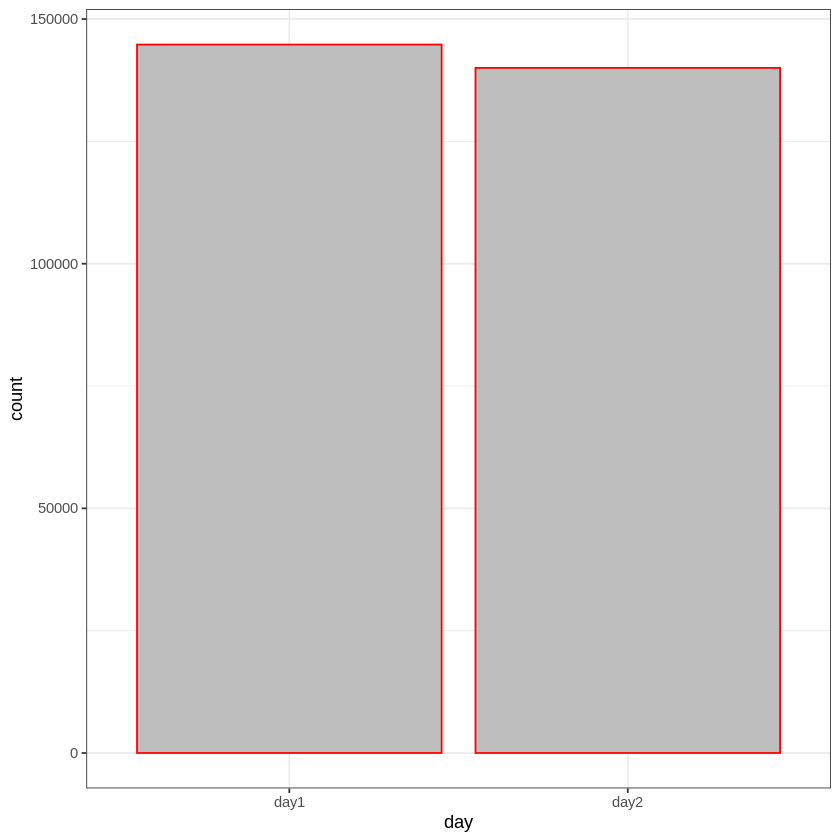

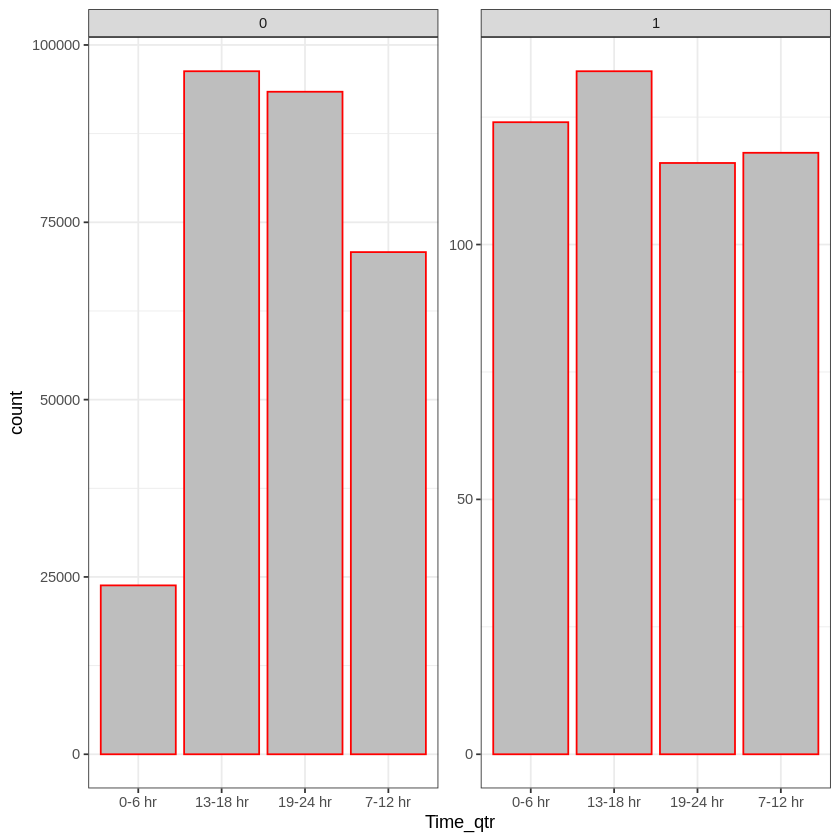

In [ ]:
#Fraud Transaction Occured at various intervals 

# In this dataset 'Time' variable contains the seconds elapsed between each transaction and the first transaction in the datase. Normalizing the time by day and category them into four quarters according to time of day.
# separate transactions by day
ModelData$day <- ifelse(ModelData$Time > 3600 * 24, "day2", "day1")

# make transaction relative to day
ModelData$Time_day <- ifelse(ModelData$day == "day2", ModelData$Time - 86400, ModelData$Time)

# ggplot to see number of transactions per day
ggplot(ModelData) + geom_bar(aes(x=day), color = "red", fill = "grey")+ theme_bw()


# Categorize the transactions into four quarters according to time of day
ModelData$Time_qtr <- as.factor(ifelse(ModelData$Time_day <= 21600, "0-6 hr",
                                       ifelse(ModelData$Time_day > 21600 & ModelData$Time_day <= 43200, "7-12 hr",
                                              ifelse(ModelData$Time_day > 43200 & ModelData$Time_day <= 64800, "13-18 hr",
                                                     "19-24 hr"))))

# Here we change the order of factor variable Time_qtr, to plot the below chart in the order of time interval in X-axis
#creditcard_details$Time_qtr <- factor(creditcard_details$Time_qtr, levels = creditcard_details$Time_qtr[order(creditcard_details$Time_day)])

# ggplot to see max number of transactions occured in time qtr(it shows that more fraud transactions occured at 13-18 hr)
ggplot(ModelData) + geom_bar(aes(x = Time_qtr), color = "red", fill = "grey") + theme_bw() + facet_wrap( ~ Class, scales = "free", ncol = 2)



# Exploratory Data Analysis - Anamoly Detection

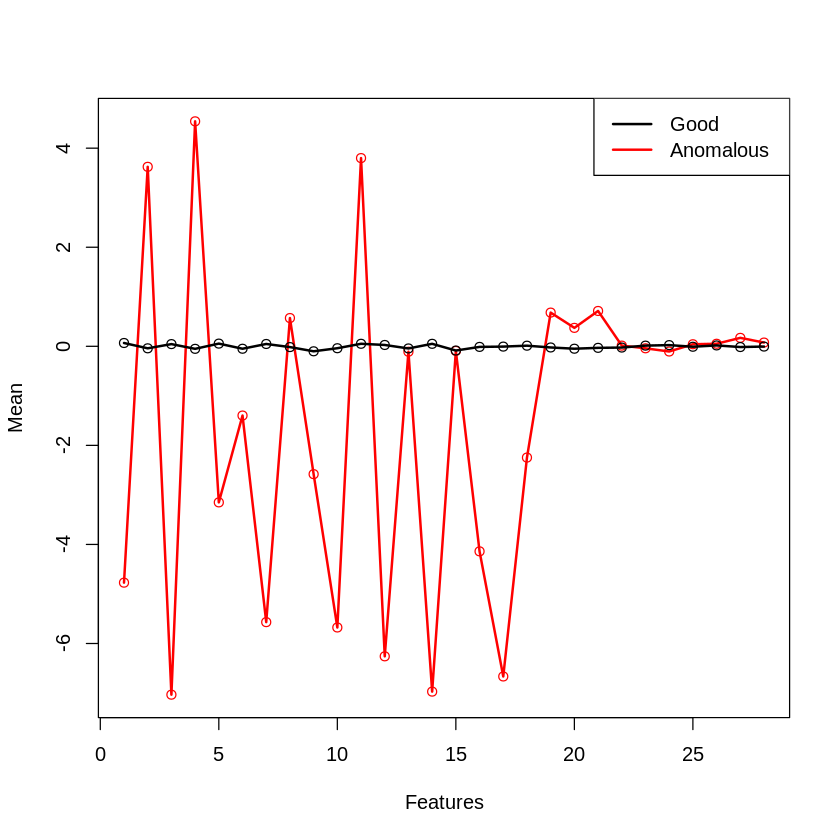

In [ ]:
# Anomaly Detection

# Remove the fields created for Exploratory Data Analysis before Anomaly Detection
ModelData <- subset(ModelData, select = -c(day, Time_day, Time_qtr))


# Exploratory Data Analysis for Anomaly Detection using Mean
rownames(ModelData) <- 1:nrow(ModelData)
non_anom <- ModelData[ModelData$Class == 0,]
anomaly <- ModelData[ModelData$Class == 1,]

mean_non_anom <- apply(non_anom[sample(rownames(non_anom), size = 492), -c(1, 30, 31)], 2, mean)
mean_anomaly <- apply(anomaly[, -c(1, 30, 31)], 2, mean)
plot(mean_anomaly, col = "red", xlab = "Features", ylab = "Mean")
lines(mean_anomaly, col = "red", lwd = 2)
points(mean_non_anom, col = "black")
lines(mean_non_anom, col = "black", lwd = 2)
legend("topright", legend = c("Good", "Anomalous"), lty = c(1,1), col = c("black", "red"), lwd = c(2,2))

In [ ]:
install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
## Univariate & Bivariate Analysis
## Univariate Analysis
#Find skewness and kurtosis of fraud amount
library(moments)
library(dplyr)

data_fraud %>% 
  summarise(Skew = skewness(data_fraud$amt), Kurtosis = kurtosis(data_fraud$amt))
#skewness =0.02 and Kurtosis = 1.5

#The Skewness for the amount variable is 0.02 as the distribution is moderately skewed.
#Kurtosis can reach values from 1 to positive infinite.
#Normal distribution kurtosis = 3
#A distribution that is more peaked and has fatter tails than normal distribution has kurtosis value greater than 3 (the higher kurtosis, the more peaked and fatter tails). Such distribution is called leptokurtic or leptokurtotic.
#A distribution that is less peaked and has thinner tails than normal distribution has kurtosis value between 1 and 3. Such distribution is called platykurtic or platykurtotic.
#The kurtosis for the crew variable is 3.72 as the distribution is more peaked and has fatter tails than normal distribution skewed.


Skew,Kurtosis
<dbl>,<dbl>
0.02584092,1.500328


In [ ]:
summary(Data)

 trans_date_trans_time     cc_num            merchant        
 Length:1296675        Min.   :6.042e+10   Length:1296675    
 Class :character      1st Qu.:1.800e+14   Class :character  
 Mode  :character      Median :3.521e+15   Mode  :character  
                       Mean   :4.172e+17                     
                       3rd Qu.:4.642e+15                     
                       Max.   :4.992e+18                     
   category              amt              first               last          
 Length:1296675     Min.   :    1.00   Length:1296675     Length:1296675    
 Class :character   1st Qu.:    9.65   Class :character   Class :character  
 Mode  :character   Median :   47.52   Mode  :character   Mode  :character  
                    Mean   :   70.35                                        
                    3rd Qu.:   83.14                                        
                    Max.   :28948.90                                        
    gender             stre

In [ ]:
#create time bins of data
Data$hour = format(as.POSIXct(Data$trans_date_trans_time), format = "%H")
Data$year = format(as.POSIXct(Data$trans_date_trans_time), format = "%Y")
Data$month = format(as.POSIXct(Data$trans_date_trans_time), format = "%m")
Data$year = as.numeric(Data$year)
Data$hour = as.numeric(Data$hour)
Data$month = as.numeric(Data$month)
Data$hour_bin = cut(Data$hour, 6, labels=c("midnight", "morning", "noon", "afternoon", "evening", "night"))


In [ ]:
head(Data, 1)
#View(Data)
data_fraud = Data[which(Data$is_fraud == 1),]
head(data_fraud, 1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,year,month,hour_bin
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,⋯,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0,0,2019,1,midnight


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,year,month,hour_bin
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
2450,2019-01-02 01:06:37,4.613315e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.43012,-81.17948,1,1,2019,1,midnight


In [ ]:
#Cost Benefit Analysis
#Average number of transactions per month
average_trans_pm = nrow(Data) / 24
average_trans_pm # 54028.125


#Average number of fraudulent transaction per month
data_fraud = Data[which(Data$is_fraud == 1),]

data_year_2019 = Data[which(data_fraud$year == 2019),]
data_year_2019_months = unique(data_year_2019$month)
data_year_2019_months #1

data_year_2020 = Data[which(data_fraud$year == 2020),]
data_year_2020_months = unique(data_year_2020$month)
data_year_2020_months #1

nrow(data_year_2019) #5220
average_trans_pm_2019 = nrow(data_year_2019) / 12
average_trans_pm_2019 # 435

data_year_2020 = Data[which(data_fraud$year == 2020),]
average_trans_pm_2020 = nrow(data_year_2020) / 12
average_trans_pm_2020 # 190.5

#Average amount per fraud transaction
data_fraud = Data[which(Data$is_fraud == 1),]
#View(data_fraud)
nrow(data_fraud) #7506
Average_fraud_amt_trans = sum(data_fraud$amt) / nrow(data_fraud) 
Average_fraud_amt_trans #531

[1] 54028.12

[1] 1

[1] 1

[1] 5220

[1] 435

[1] 190.5

[1] 7506

[1] 531.3201

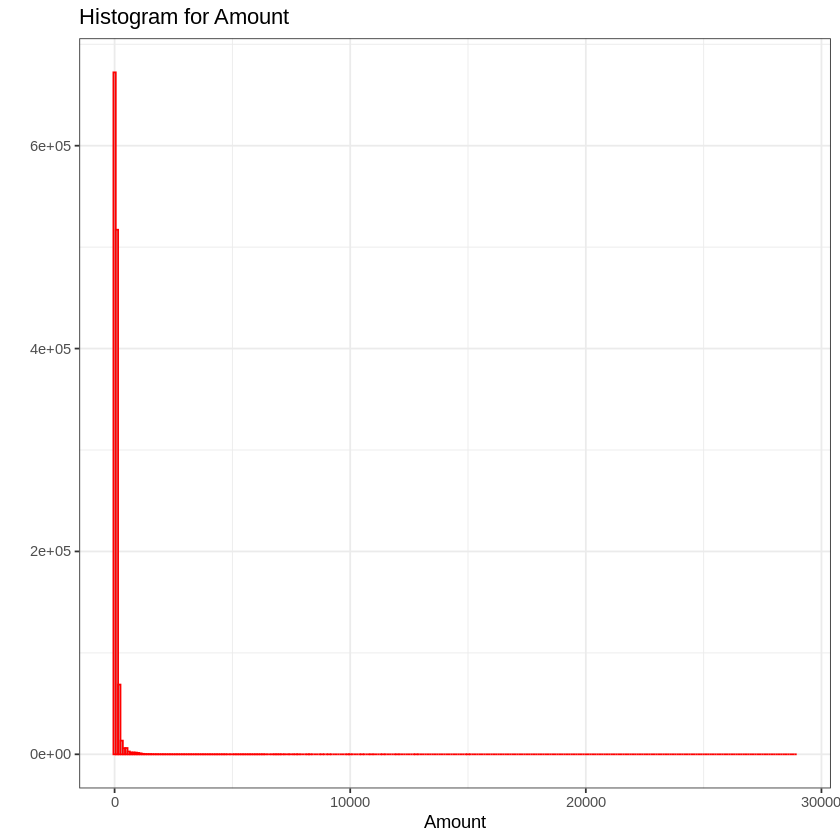

In [ ]:
#Histogram
library(ggplot2)

qplot(Data$amt,
      geom="histogram",
      binwidth=100,  
      main="Histogram for Amount", 
      xlab="Amount", 
      fill=I("gray"), 
      col=I("red"))+theme_bw()

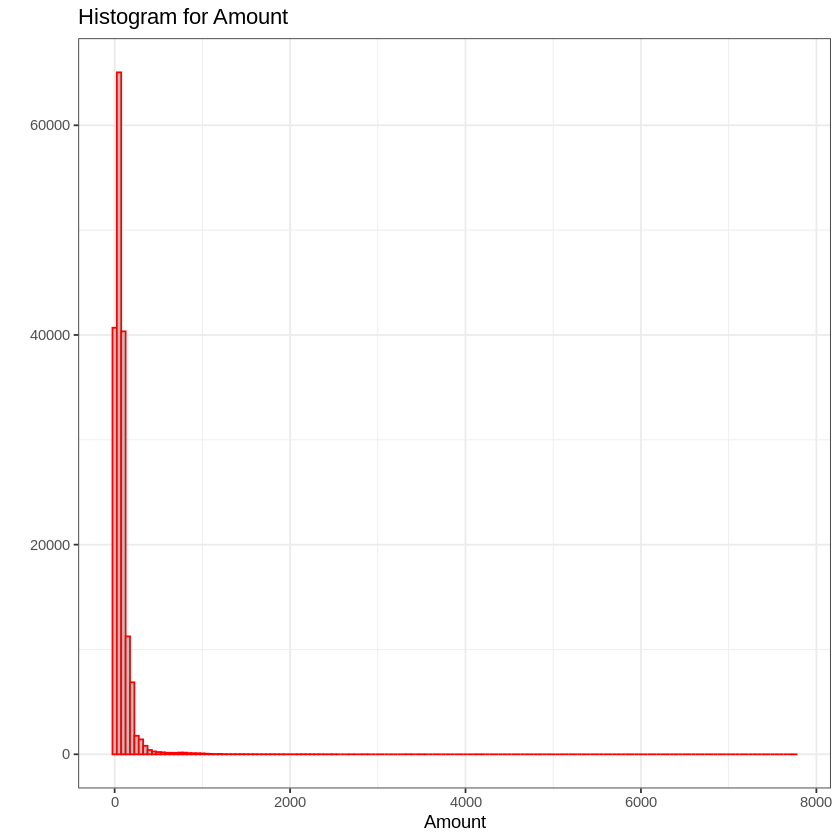

In [ ]:
Data_hour_bin_mignight = Data[which(Data$hour_bin == "midnight"),]
qplot(Data_hour_bin_mignight$amt,
      geom="histogram",
      binwidth=50,  
      main="Histogram for Amount", 
      xlab="Amount", 
      fill=I("gray"), 
      col=I("red"))+theme_bw()


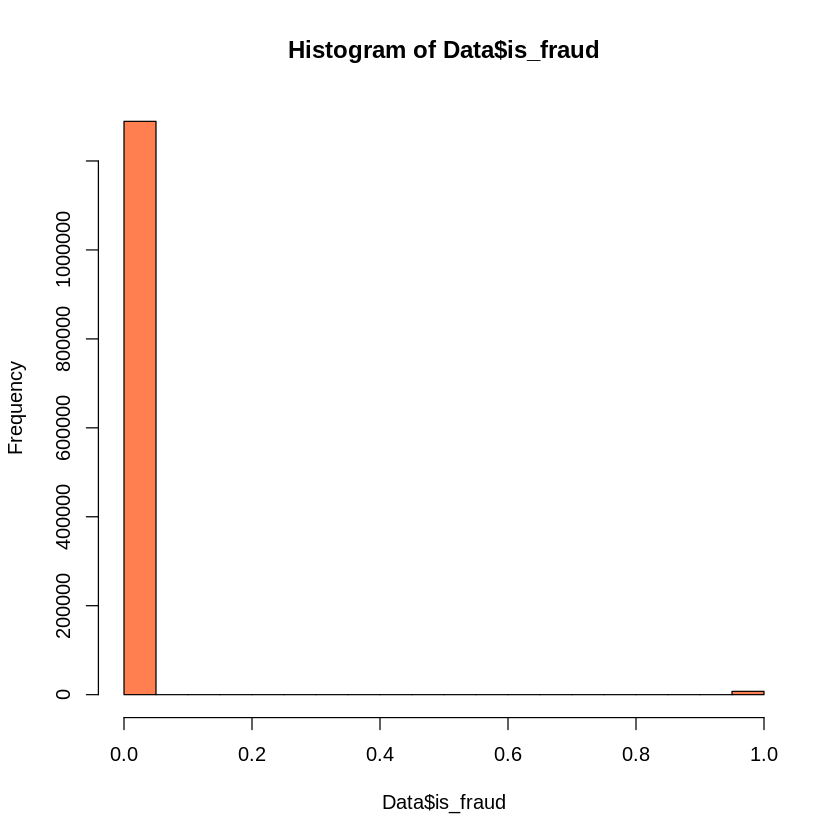

In [ ]:
hist(Data$is_fraud,col="coral")


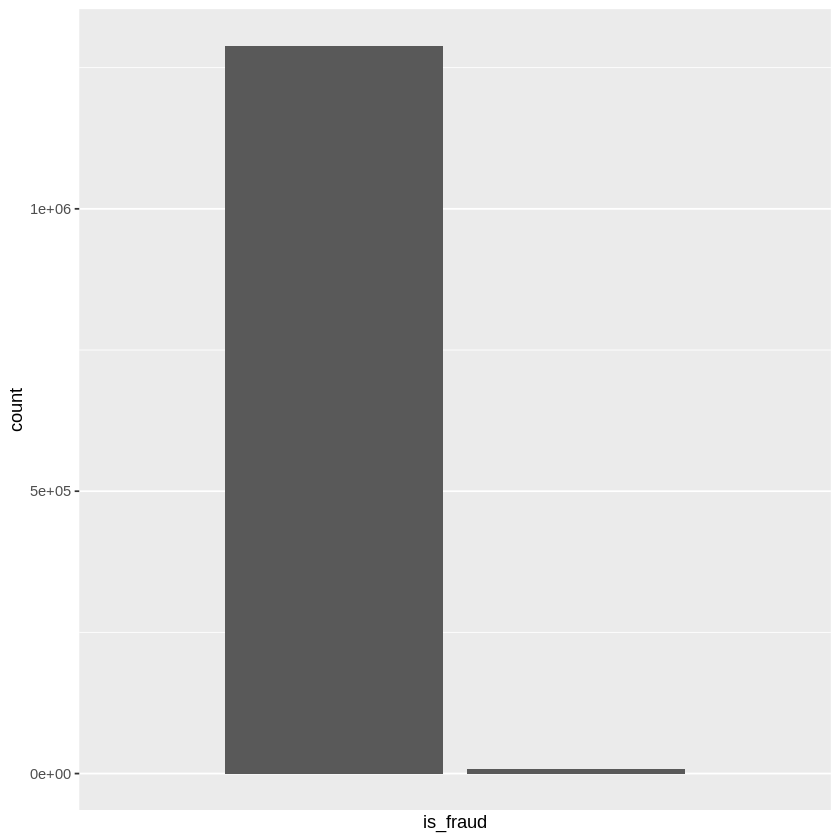

In [ ]:
#Bivariate Analysis
#Dataset is highly imbalanced
ggplot(data = Data, aes(x = is_fraud), 
       y = prop.table(stat(count)), fill = is_fraud,
       label = scales::percent(prop.table(stat(count)))) + geom_bar(position = "dodge") + 
  scale_x_discrete(labels = c("no fraud", "fraud"))


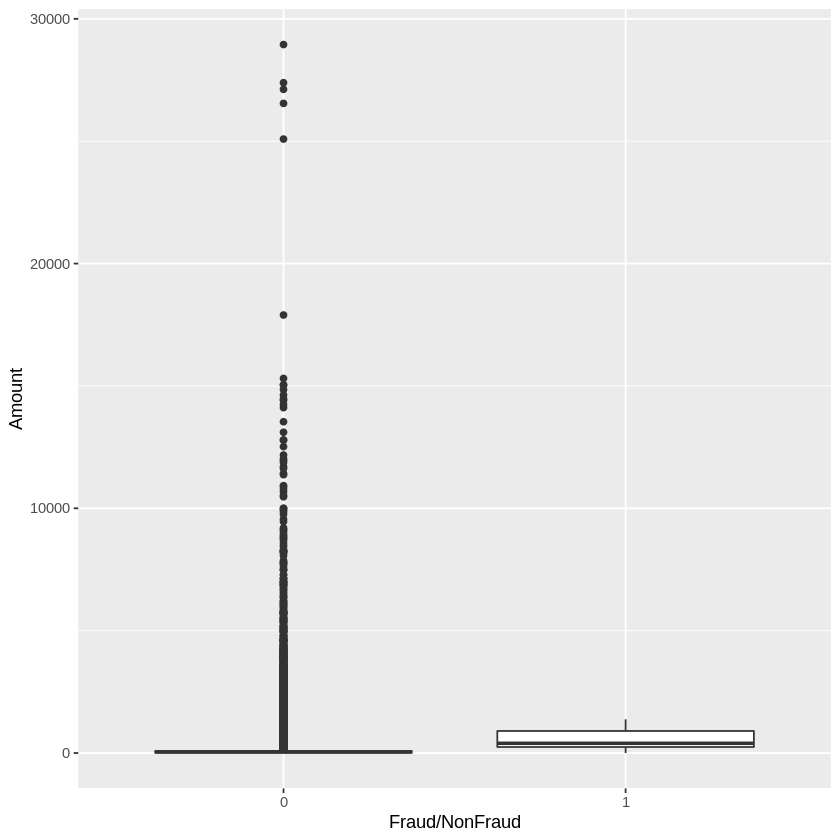

In [ ]:
#Data variability is high in non fraud transactions
ggplot(Data, aes(x = factor(is_fraud), y = amt)) + geom_boxplot() + labs(x = 'Fraud/NonFraud', y = 'Amount')


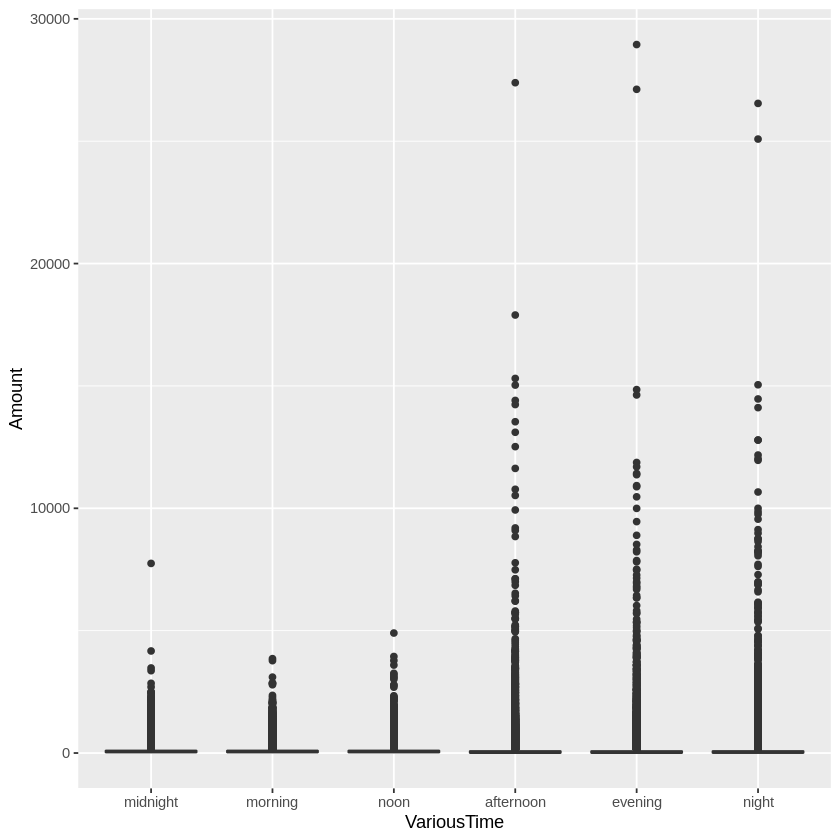

In [ ]:
ggplot(Data, aes(x = factor(hour_bin), y = amt)) + geom_boxplot() + labs(x = 'VariousTime', y = 'Amount')


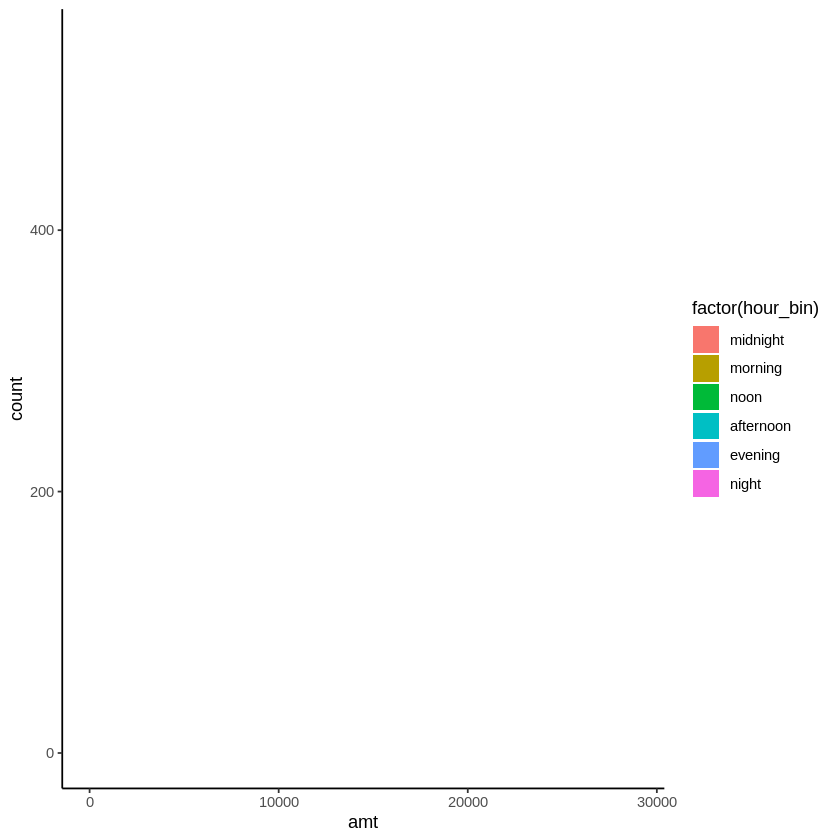

In [ ]:

ggplot(Data, aes(x = amt, fill = factor(hour_bin))) +
  geom_bar() +
  theme_classic()


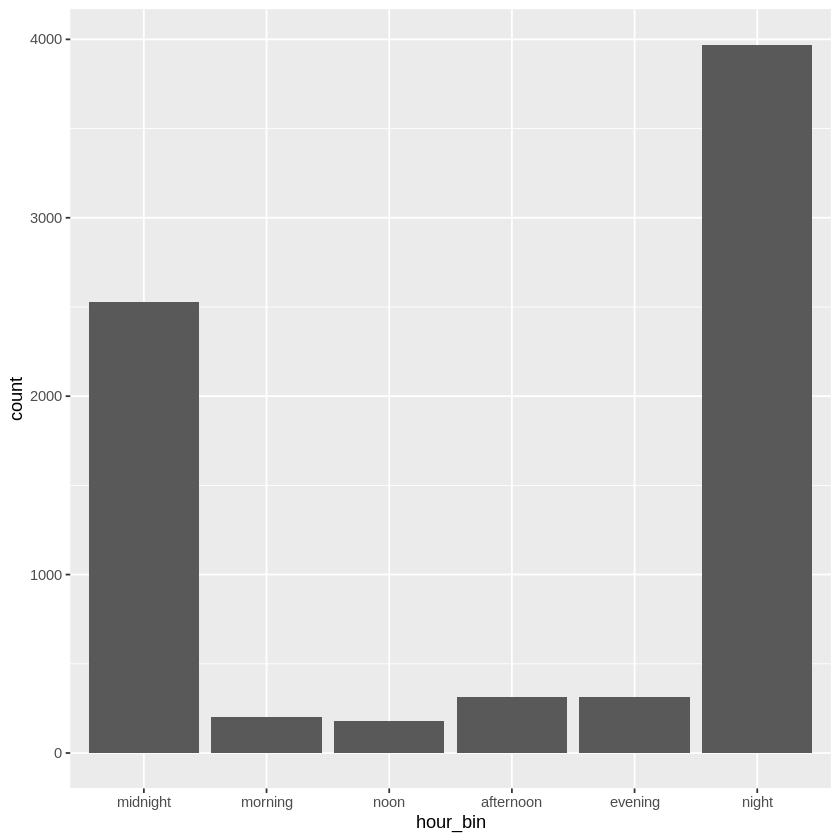

In [ ]:
ggplot(data = data_fraud, aes(x = hour_bin), 
       y = prop.table(stat(count)),
       label = scales::percent(prop.table(stat(count)))) + geom_bar()


`geom_smooth()` using formula 'y ~ x'



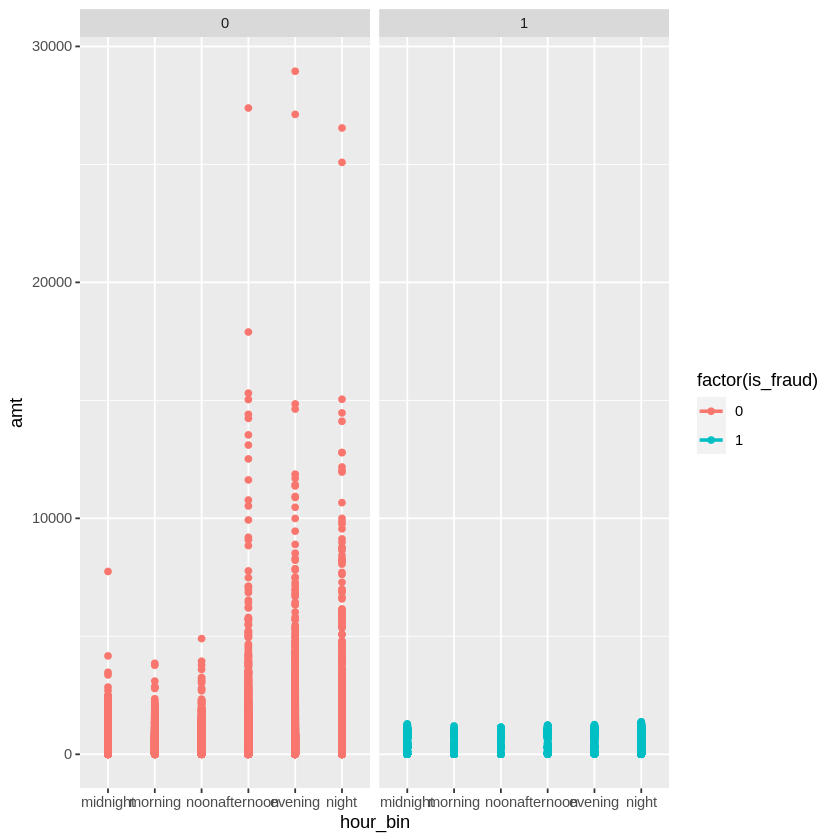

In [ ]:
# Faceting: We Facet the data into groups to better understand the data.
library(ggplot2)
ggplot(data = Data,
       aes(y = amt, x = hour_bin, col = factor(is_fraud))) + 
  geom_point() +
  geom_smooth(se = F, method = 'lm') +
  facet_grid(~(is_fraud))


`geom_smooth()` using formula 'y ~ x'



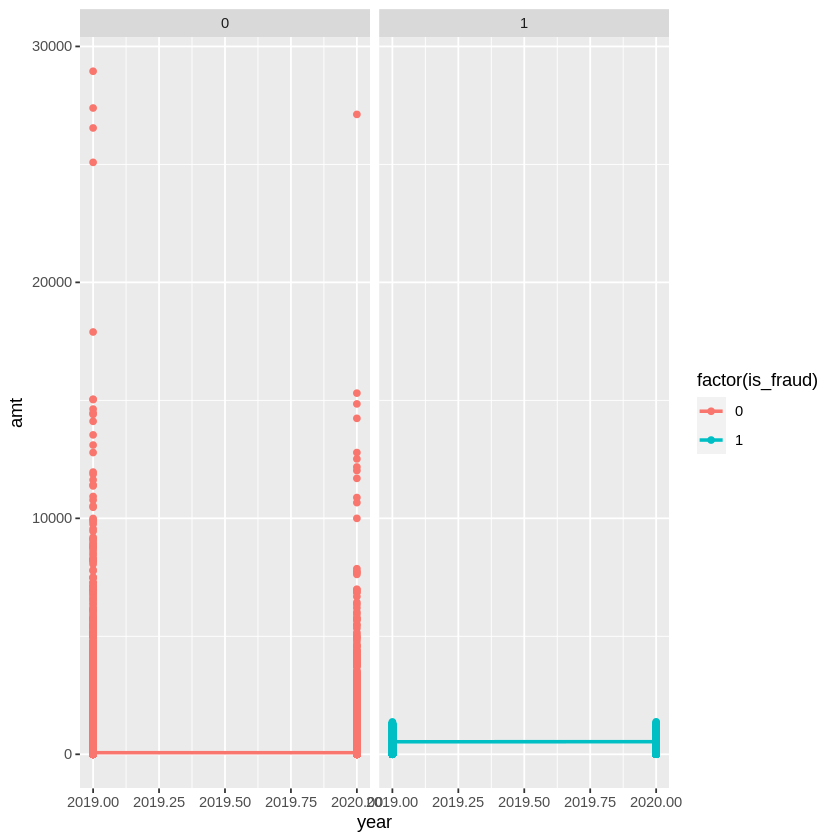

In [ ]:

ggplot(data = Data,
       aes(y = amt, x = year, col = factor(is_fraud))) + 
  geom_point() +
  geom_smooth(se = F, method = 'lm') +
  facet_grid(~(is_fraud))


In [ ]:
### 7. #Finding the Imbalance in Dependent variable
str(ModelData)

'data.frame':	284807 obs. of  31 variables:
 $ X.Time.  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ X.V1.    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ X.V2.    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ X.V3.    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ X.V4.    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ X.V5.    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ X.V6.    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ X.V7.    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ X.V8.    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ X.V9.    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ X.V10.   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ X.V11.   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ X.V12.   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ X.V13.   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ X.V14.   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ X.V15.   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ X.V16.   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ X.

In [ ]:
#checking class imbalance
table(ModelData$Class)
# class imbalance in percentage
prop.table(table(ModelData$Class)) #99.82% vs 0.17%



     0      1 
284315    492 


          0           1 
0.998272514 0.001727486 

In [ ]:
# Now we will group the datas based on the Class value and 
# For this we will use dplyr package which contans group by function.
ModelData$Class <- as.factor(ModelData$Class)
creditcardDF <- ModelData %>% group_by(Class) %>% summarize(Class_count = n())
print(head(creditcardDF))


# A tibble: 2 × 2
  Class Class_count
  <fct>       <int>
1 0          284315
2 1             492


In [ ]:
# Finding the percentage of each Class category.
creditcardDF$Class_count <- 100 * creditcardDF$Class_count / nrow(ModelData)
creditcardDF$ncount_p <- paste(round(creditcardDF$Class_count,2),"%")


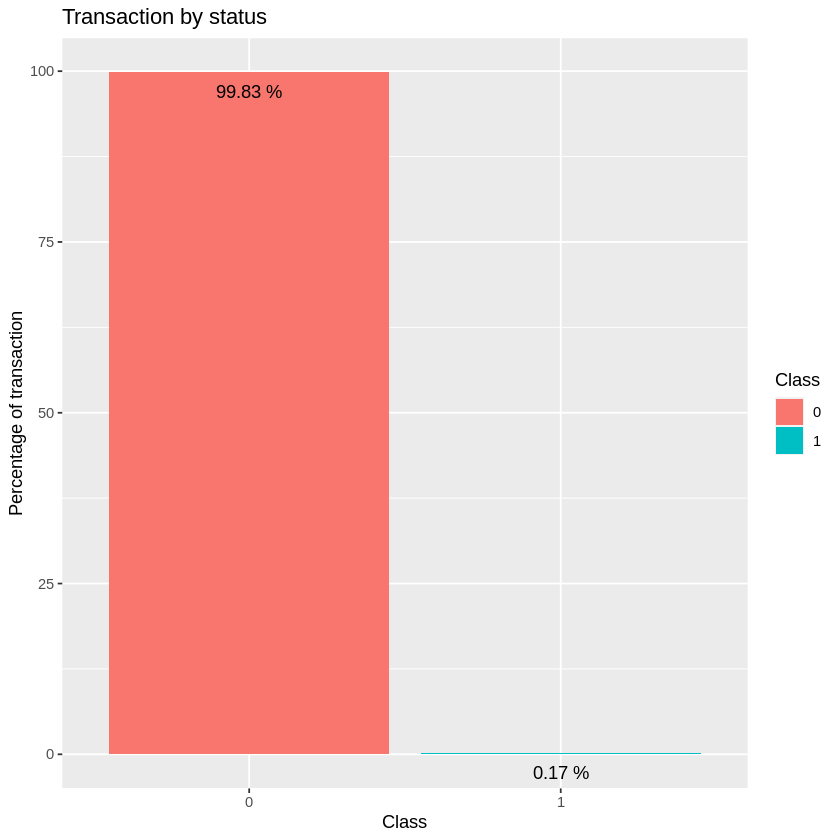

In [ ]:
# Applying ggplot2 to visualize the results for Number of transaction under each Class Status, 
# Class 0 are Good transactions and Class 1 represents Fraud transactions.
# In Xaxis we have Class Status and In yaxis we have Percentage of transaction.

ggplot(creditcardDF,aes(x=Class,y=Class_count,fill=Class)) +
  geom_bar(stat="identity") + geom_text(aes(label=ncount_p),vjust = 2) +
  ggtitle("Transaction by status") + xlab("Class") + ylab("Percentage of transaction")


In [ ]:
### 8.#two t-sample test X & Y IV vs DV 
#H0 = mean loan default status cusomters = married people  
#H1 = mean is not equal to zero where loan defaulted are married 
# Compute t-test
#View(group1)
#install.packages("ggpubr")
#str(Data)
Ttestdata=Data[,c(5,11,22)] # Target Variables is is_fraud (22) with amt (5) and State (11) as continuous and categorical predictors respectively
#View(Ttestdata)
Y0=subset(Ttestdata,Ttestdata$amt < 500)$is_fraud
Y1=subset(Ttestdata,Ttestdata$amt >=500)$is_fraud
t.test(Y0,Y1) 
# t.test(Y0,Y1) #P < 0.05 So, reject null hypothesis that there is no differences between both the variables response variable based on the
#continuous predictors ie Amount  and state mentioned above are different wrt #target variables 


	Welch Two Sample t-test

data:  Y0 and Y1
t = -68.083, df = 15636, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2370032 -0.2237384
sample estimates:
  mean of x   mean of y 
0.003011606 0.233382381 


In [ ]:
#9 Splitting the dataset into train and test datasets
#install.packages("caTools")
#summary(ModelData)
#str(ModelData)
#head(ModelData)

library(caTools)
set.seed(123)
split = sample.split(ModelData$Class, SplitRatio =0.8)
training_set = subset(ModelData, split == TRUE)
test_set = subset(ModelData, split == FALSE)

In [ ]:
#Feature scaling the fields for attending to normalize the Skewness in the dataset
training_set[-31] = scale(training_set[-31])
test_set[-31] = scale(test_set[-31])

# class ratio initially
table(training_set$Class)


     0      1 
227452    394 

#Class Imbalance - Treatment
As the data has less Fraud transactions(less than 1%), we have to apply sample methods to balance the data. We applied Over, Upper, Mixed(both) and ROSE sampling methods using ROSE package and SMOTE sampling method using DMwR package

In [ ]:
#Checking the data how much the data is imbalance
print('Number of transactions in train dataset before applying sampling methods')
print(table(training_set$Class))


[1] "Number of transactions in train dataset before applying sampling methods"

     0      1 
227452    394 


In [ ]:
#install.packages("bitops",repos="https://cran.r-project.org/bin/windows/contrib/3.3/bitops_1.0-6.zip",dependencies=TRUE,type="source")
install.packages('abind')
install.packages('zoo')
install.packages('xts')
install.packages('quantmod')
install.packages('ROCR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gplots’




In [ ]:
install.packages("ROSE")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(bitops)
library(abind)
library(zoo)
library(xts)
library(quantmod)
library(ROCR)
#library(DMwR)
library(ROSE)



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded ROSE 0.0-4




In [ ]:
#library(SMOTE)

In [ ]:
# Oversampling, as Fraud transactions(1) are having less occurrence, so this Over sampling method will increase the Fraud records untill matches good records 45490
over_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="over", N=454904)$data
print('Number of transactions in train dataset after applying Over sampling method')
print(table(over_sample_train_data$Class))
#View(over_sample_train_data)
#summary(over_sample_train_data)

# Undersampling,as Fraud transactions(1) are having less occurrence, so this Under sampling method will descrease the Good records untill matches Fraud records, But, you see that we've lost significant information from the sample. 
under_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="under", N=788)$data
print('Number of transactions in train dataset after applying Under sampling method')
print(table(under_sample_train_data$Class))

# Mixed Sampling, apply both under sampling and over sampling on this imbalanced data
both_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="both", p=0.5, seed=222, N=227846)$data
print('Number of transactions in train dataset after applying Mixed sampling method')
print(table(both_sample_train_data$Class))

# ROSE Sampling, this helps us to generate data synthetically. It generates artificial datas instead of dulicate data.
rose_sample_train_data <- ROSE(Class ~ ., data = training_set,  seed=111)$data
print('Number of transactions in train dataset after applying ROSE sampling method')
print(table(rose_sample_train_data$Class))

# SMOTE(Synthetic Minority Over-sampling Technique) Sampling
# formula - relates how our dependent variable acts based on other independent variable.
# data - input data
# perc.over - controls the size of Minority class
# perc.under - controls the size of Majority class
# since my data has less Majority class, increasing it with 200 and keeping the minority class to 100.
#View(training_set)
#smote_sample_train_data <- SMOTE(Class ~ ., data = training_set, perc.over = 100, perc.under=200)
#print('Number of transactions in train dataset after applying SMOTE sampling method')
#print(table(smote_sample_train_data$Class))

[1] "Number of transactions in train dataset after applying Over sampling method"

     0      1 
227452 227452 
[1] "Number of transactions in train dataset after applying Under sampling method"

  0   1 
394 394 
[1] "Number of transactions in train dataset after applying Mixed sampling method"

     0      1 
113630 114216 
[1] "Number of transactions in train dataset after applying ROSE sampling method"

     0      1 
113827 114019 


In [ ]:
# Apply Logistic classifier on balanced data

# Now we have five different types of inputs which are balanced and ready for prediction.
# We can appply Logistic classifier to all these five datasets and calculate the performance of each.

#10 Import Logistic Regression
library(MASS)
#11 Fitting  Logistic classifier for Over sampling dataset
over_classifier = glm(formula = Class ~ ., family = binomial, data = over_sample_train_data)

# Logistic classifier for Under sampling dataset
under_classifier = glm(formula = Class ~ ., family = binomial, data = under_sample_train_data)

# Logistic classifier for Mixed sampling dataset
both_classifier = glm(formula = Class ~ ., family = binomial, data = both_sample_train_data)

#Logistic classifier for ROSE sampling dataset
rose_classifier = glm(formula = Class ~ ., family = binomial, data = rose_sample_train_data)

# Logistic classifier for SMOTE dataset
#smote_classifier = glm(formula = Class ~ ., family = binomial, data = smote_sample_train_data)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
#12 Prediction on test set using sampling classifiers

# Predicting the test set using Over sampling classifier
over_probability_predict = predict(over_classifier, type = 'response', newdata = test_set[-31])
y_pred_over = ifelse(over_probability_predict>0.5, 1, 0)

# Predicting the test set using Under sampling classifier
under_probability_predict = predict(under_classifier, type = 'response', newdata = test_set[-31])
y_pred_under = ifelse(under_probability_predict>0.5, 1, 0)

# Predicting the test set using Mixed sampling classifier
both_probability_predict = predict(both_classifier, type = 'response', newdata = test_set[-31])
y_pred_both = ifelse(both_probability_predict>0.5, 1, 0)

# Predicting the test set using ROSE classifier
rose_probability_predict = predict(rose_classifier, type = 'response', newdata = test_set[-31])
y_pred_rose = ifelse(rose_probability_predict>0.5, 1, 0)

# Predicting the test set using SMOTE classifier
#smote_probability_predict = predict(smote_classifier, type = 'response', newdata = test_set[-31])
#y_pred_smote = ifelse(smote_probability_predict>0.5, 1, 0)


In [ ]:
install.packages("PRROC")
install.packages("pROC")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
#13 ROC Curve

# roc.curve function from ROSE package returns the ROC curve and AUC value.
# We can see the AUC value by making the plotit as FALSE and print the curve.
# It takes dependent variable as the first parameter and the class to be evaluated
# plotit is logical for plotting the ROC curve. color of the curve can be given in col.
library(pROC)
#library(dplyr) # for data manipulation
library(PRROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘PRROC’


The following object is masked from ‘package:ROSE’:

    roc.curve




In [ ]:
install.packages("smotefamily")
library(smotefamily) # synthetic minority over-sampling

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’




In [ ]:

#view(test_set)
#roc_over <- roc.curve(test_set$Class, y_pred_over, plotit = TRUE)
#roc_over <- roc.curve(test_set$Class, y_pred_over)
#print(roc_over) #0.943

#roc_under <- roc.curve(test_set$Class, y_pred_under, plotit = F)
#print(roc_under) #0.792
#roc_both <- roc.curve(test_set$Class, y_pred_both, plotit = F)
#print(roc_both) #0.943
#roc_rose <- roc.curve(test_set$Class, y_pred_rose, plotit = F)
#print(roc_rose) #0.928
#roc_smote <- roc.curve(test_set$Class, y_pred_smote, plotit = F)
#print(roc_smote) #0.755


roccurve_over=roc(test_set[,31],y_pred_over,plot=FALSE,legacy.axes=TRUE)
roccurve_over$auc #0.9434

roccurve_under=roc(test_set[,31],y_pred_under,plot=FALSE,legacy.axes=TRUE)
roccurve_under$auc #0.7607

roccurve_both=roc(test_set[,31],y_pred_both,plot=FALSE,legacy.axes=TRUE)
roccurve_both$auc #0.9433

roccurve_rose=roc(test_set[,31],y_pred_rose,plot=FALSE,legacy.axes=TRUE)
roccurve_rose$auc #0.9285

#roccurve_smote=roc(test_set[,31],y_pred_smote,plot=FALSE,legacy.axes=TRUE)
#roccurve_smote$auc #0.7753


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9434

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7607

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9433

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9285

#Class Imbalance - Sampling Methods Conclusion

We have applied ROC AUC curve to check the accuracy, for class imbalance problems its ideally observed that to consider AUC. Among the five sampling methods the Over sampling method gives us the highest AUC value of 94.33% which is the better sampling method for our dataset.


In [ ]:
### 14.0 Evaluate predictions on the test data dataset through Confusion Matrix
###Using Sampling both over and under 
install.packages("caret")
library(caret) # synthetic minority over-sampling

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [ ]:
###Using Sampling over 
pred_Y_over=ifelse(y_pred_over > 0.70,1,0)#threshold taken is .70
confusionMatrix(as.factor(test_set[,31]), as.factor(pred_Y_over))
# Sensitivity - 0.9998
# Specificity - 0.0682
# Positive predictive value - 0.9786
# Accuracy = 0.9785

# Validation of our model using validation dataset 
fittedresults = predict(over_classifier, newdata=test_set, type='response')

# If results are more than 50% then convert to 1 else 0
fittedresults = ifelse(fittedresults >=0.5,1,0)

test_set$fittedresults = fittedresults
#View(test_set)


Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 55647  1216
         1     9    89
                                          
               Accuracy : 0.9785          
                 95% CI : (0.9773, 0.9797)
    No Information Rate : 0.9771          
    P-Value [Acc > NIR] : 0.0124          
                                          
                  Kappa : 0.1241          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9998          
            Specificity : 0.0682          
         Pos Pred Value : 0.9786          
         Neg Pred Value : 0.9082          
             Prevalence : 0.9771          
         Detection Rate : 0.9769          
   Detection Prevalence : 0.9983          
      Balanced Accuracy : 0.5340          
                                          
       'Positive' Class : 0               
                  

In [ ]:
### 14.1 Evaluate predictions on the test dataset through Confusion Matrix
CFM1 = table(predicted = test_set$fittedresults, actual = test_set$Class)
CFM1

LR_Classification_Accurancy = sum(diag(CFM1)/sum(CFM1))
LR_Classification_Accurancy#97.8%

         actual
predicted     0     1
        0 55647     9
        1  1216    89

[1] 0.9784941

In [ ]:
TN = CFM1[1,1] # True Negative - Actual & Predicted is 0/N
TP = CFM1[2,2] # True Positive - Actual & Predicted is 1/Y
FP = CFM1[2,1] # False Positive - Actual is 0/N but Predicted is 1/Y
FN = CFM1[1,2] # False Negative - Actual is 1/Y but Predicted is 0/N
TO = TN+TP+FP+FN # Total Observations


In [ ]:
###15. Overall Final metrics for the LR model
accuracy = (TP+TN)/TO # Accuracy or Prevalence of Confusion Matrix
accuracy # 97.84%

precision = TP/(TP+FP) # Precision
precision # 6.81%

sensitivity = TP/(TP+FN) # True Positive Rate (as high as possible)
sensitivity # 90.81%


specificity = TN/(TN+FP) # True Negative Rate
specificity # 97.86%
Fallout = 1 - specificity
Fallout #2.13%

Fall_out = FP/(FP+TN) # False Positive Rate (as low as possible)
Fall_out*100  # 2.13%


error = (FP+FN)/TO # Error Rate
error # 2.15%

sensitivity_CFM1 = sensitivity #90.81%
Fallout_CFM1 = Fallout*100  #2.13%

[1] 0.9784941

[1] 0.06819923

[1] 0.9081633

[1] 0.9786153

[1] 0.02138473

[1] 2.138473

[1] 0.02150594

#Conclusion of Model 1 - Logistic Regression Model

Summary of the model findings states that sensitivity_CFM1 is 90.81% with AUC of 94.34% and ROC curve (receiver operating characteristic curve) - Greater the area under the ROC curve, better the predictive ability of the model illustrates the sensitivity and specificity for all possible cutoff values. Also, the Fallout_CFM1 is 2.13% with Accuracy of the model is at 97.84%

In [ ]:
###############################
## Random Forest
###############################
install.packages("randomForest")
library(randomForest)
library(stats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
### 1. Checking the features with the right data types
over_sample_train_data$Class=as.factor(over_sample_train_data$Class)
#View(over_sample_train_data)
head(over_sample_train_data,2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.994757,-0.6950033,-0.0451209,1.6736470,0.9745538,-0.24863536,0.35104684,0.19806874,0.08252626,0.3328091,⋯,-0.0254493,0.3836749,-0.1783661,0.1110584,0.2461317,-0.3916746,0.33684947,-0.06460037,0.2573266,0
2,-1.994757,0.6107111,0.1617106,0.1091986,0.3170705,0.04503015,-0.06182636,-0.06471463,0.07102327,-0.2306557,⋯,-0.3084798,-0.8807805,0.1608289,-0.5604078,0.3201181,0.2614320,-0.02229593,0.04476357,-0.3578673,0


# Hyperparameter Tuning - Random Forest Model

In [ ]:
### 2. Tuning the right mTry for the Random Forest model  
#ntree 200 is max no of tree and mtry is 12 which shouldnt exceed max no of variables 

bestmtry = tuneRF(over_sample_train_data[,-c(31)],over_sample_train_data$Class,stepFactor = 1.2, improve = 0.01,trace = T, plot = T,doBest = TRUE,
importance=TRUE)


mtry = 5  OOB error = 0% 
Searching left ...
Searching right ...
mtry = 6 	OOB error = 0.01% 
-0.04545455 0.01 


In [ ]:
### 3. Fitting the Random Forest model using nTree as 150 and mTry as 3  
nrow(over_sample_train_data)
nrow(training_set)



[1] 454904

[1] 227846

In [ ]:
RFM = randomForest(Class~.,data = over_sample_train_data,ntree=150, mtry=6,na.action=na.exclude)


In [ ]:
RFM


Call:
 randomForest(formula = Class ~ ., data = over_sample_train_data,      ntree = 150, mtry = 6, na.action = na.exclude) 
               Type of random forest: classification
                     Number of trees: 150
No. of variables tried at each split: 6

        OOB estimate of  error rate: 0%
Confusion matrix:
       0      1  class.error
0 227431     21 9.232717e-05
1      0 227452 0.000000e+00

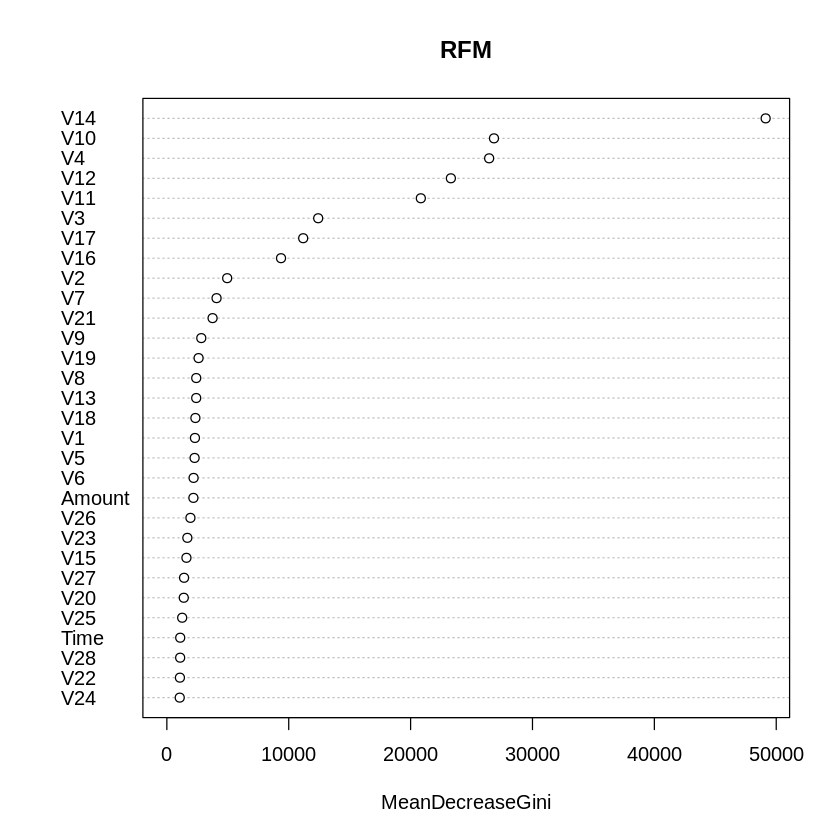

In [ ]:
### 4. Checking  the  most significant variables from the Random Forest model 
#importance(RFM)
# MeanDecreaseGini
# V17           136.29
varImpPlot(RFM)
#Hyper parameter obtained is ntree 150 and mtry as 3


In [ ]:
### 5. Evaluating Model Accuracy

Class_pred = predict(RFM,test_set)
test_set$Class_pred = Class_pred
#View(testdata)
# Evaluate predictions on the testdata dataset through Confusion Matrix

In [ ]:
### 6. Building Confusion Matrix
CFM2 = table(test_set$Class,test_set$Class_pred)
CFM2


   
        0     1
  0 56860     3
  1    24    74

In [ ]:
### 7. Calculating the Accuracy of the model using test data 
Classification_Accurancy = sum(diag(CFM2)/sum(CFM2))
Classification_Accurancy #99.95

TN = CFM2[1,1] # True Negative - Actual & Predicted is 0/N
TP = CFM2[2,2] # True Positive - Actual & Predicted is 1/Y
FP = CFM2[2,1] # False Positive - Actual is 0/N but Predicted is 1/Y
FN = CFM2[1,2] # False Nefgative - Actual is 1/Y but Predicted is 0/N
TO = TN+TP+FP+FN # Total Observations

accuracy = (TP+TN)/TO # Accuracy or Prevalence of Confusion Matrix
accuracy # 99.95%

precision = TP/(TP+FP) # Precision
precision # 75.51%

sensitivity = TP/(TP+FN) # True Positive Rate (as high as possible)
sensitivity # 96.10%

specificity = TN/(TN+FP) # True Negative Rate
specificity # 99.95%

Fallout = 1 - specificity # False Negative Rate (as low as possbile)
Fallout*100  #0.04219%

error = (FP+FN)/TO # Error Rate
error # 0.047%

sensitivity_CFM2 = sensitivity #96.10%
Fallout_CFM2 = Fallout*100 #0.042%


[1] 0.999526

[1] 0.999526

[1] 0.755102

[1] 0.961039

[1] 0.9995781

[1] 0.04219113

[1] 0.0004740085

#Conclusion of Model 2 - Random Forest Model

Summary of the model findings that sensitivity_CFM2 is 96.05%. Overall the  model illustrates the sensitivity and the Fallout_CFM1 is 0.043% with Accuracy of the model 99.95%.

# Cross Validation - K Fold Sampling Technique

In [ ]:
install.packages("tidyverse")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("tidyverse") 
library("caret")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble 3.1.6     ✔ purrr  0.3.4
✔ tidyr  1.1.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand()   masks Matrix::expand()
✖ tidyr::extract()  masks R.utils::extract()
✖ dplyr::filter()   masks stats::filter()
✖ xts::first()      masks dplyr::first()
✖ dplyr::lag()      masks stats::lag()
✖ xts::last()       masks dplyr::last()
✖ purrr::lift()     masks caret::lift()
✖ tidyr::pack()     masks Matrix::pack()
✖ caret::progress() masks httr::progress()
✖ MASS::select()    masks dplyr::select()
✖ xgboost::slice()  masks dplyr::slice()
✖ tidyr::unpack()   masks Matrix::unpack()



In [ ]:
install.packages("naivebayes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("naivebayes")

naivebayes 0.9.7 loaded



In [ ]:
prop.table(table(over_sample_train_data$Class))



  0   1 
0.5 0.5 

In [ ]:
nrow(over_sample_train_data)

[1] 454904

In [ ]:
head(over_sample_train_data,2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.994757,-0.6950033,-0.0451209,1.6736470,0.9745538,-0.24863536,0.35104684,0.19806874,0.08252626,0.3328091,⋯,-0.0254493,0.3836749,-0.1783661,0.1110584,0.2461317,-0.3916746,0.33684947,-0.06460037,0.2573266,0
2,-1.994757,0.6107111,0.1617106,0.1091986,0.3170705,0.04503015,-0.06182636,-0.06471463,0.07102327,-0.2306557,⋯,-0.3084798,-0.8807805,0.1608289,-0.5604078,0.3201181,0.2614320,-0.02229593,0.04476357,-0.3578673,0


In [ ]:
data = over_sample_train_data

data$Class = as.numeric(data$Class)

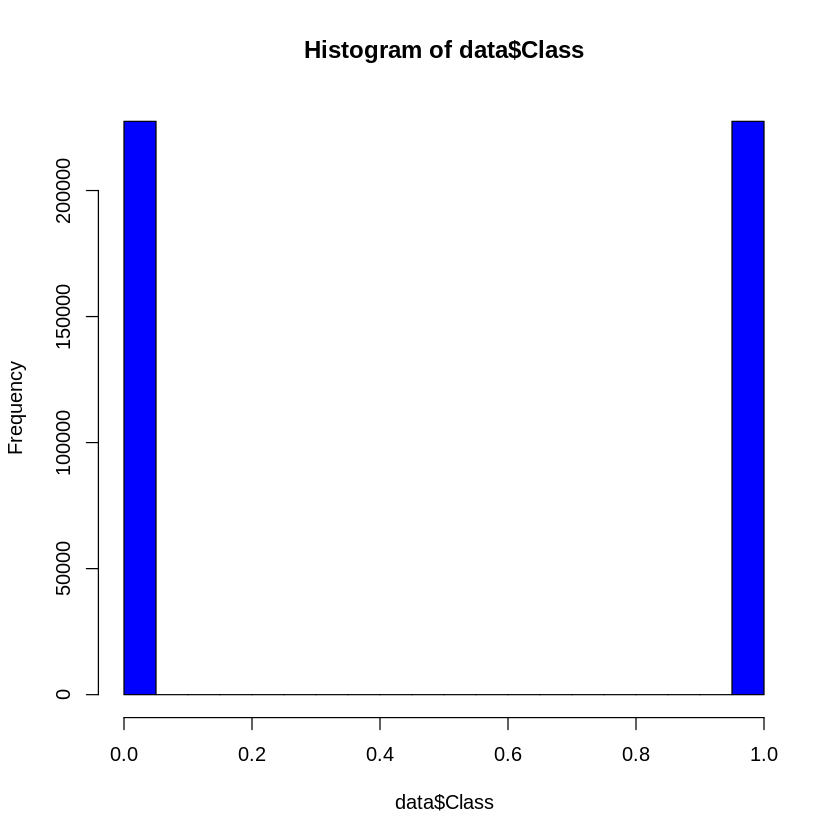

In [ ]:
hist(data$Class,col="blue")


In [ ]:
prop.table(table(data$Class))



  0   1 
0.5 0.5 

In [ ]:
set.seed(100)
trctrl <- trainControl(method = "cv", number = 10, savePredictions=TRUE)
nb_fit <- train(factor(Class) ~., data = data, method = "naive_bayes", trControl=trctrl, tuneLength = 0)
nb_fit

Naive Bayes 

454904 samples
    30 predictor
     2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 409414, 409414, 409413, 409413, 409414, 409413, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.9179101  0.8358203
   TRUE      0.9165099  0.8330197

Tuning parameter 'laplace' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were laplace = 0, usekernel = FALSE
 and adjust = 1.

It will print the detail to the console once it is finished. The accuracy shown in the console is the average accuracy from all the training folds. We can see that our model has an 91.65% average accuracy.

In [ ]:
pred <- nb_fit$pred
pred$equal <- ifelse(pred$pred == pred$obs, 1,0)

In [ ]:
eachfold <- pred %>%                                        
  group_by(Resample) %>%                         
  summarise_at(vars(equal),                     
               list(Accuracy = mean))              
eachfold

Resample,Accuracy
<chr>,<dbl>
Fold01,0.9165201
Fold02,0.9164652
Fold03,0.9173573
Fold04,0.9195006
Fold05,0.9167839
Fold06,0.9167967
Fold07,0.9168718
Fold08,0.9178061
Fold09,0.9155437


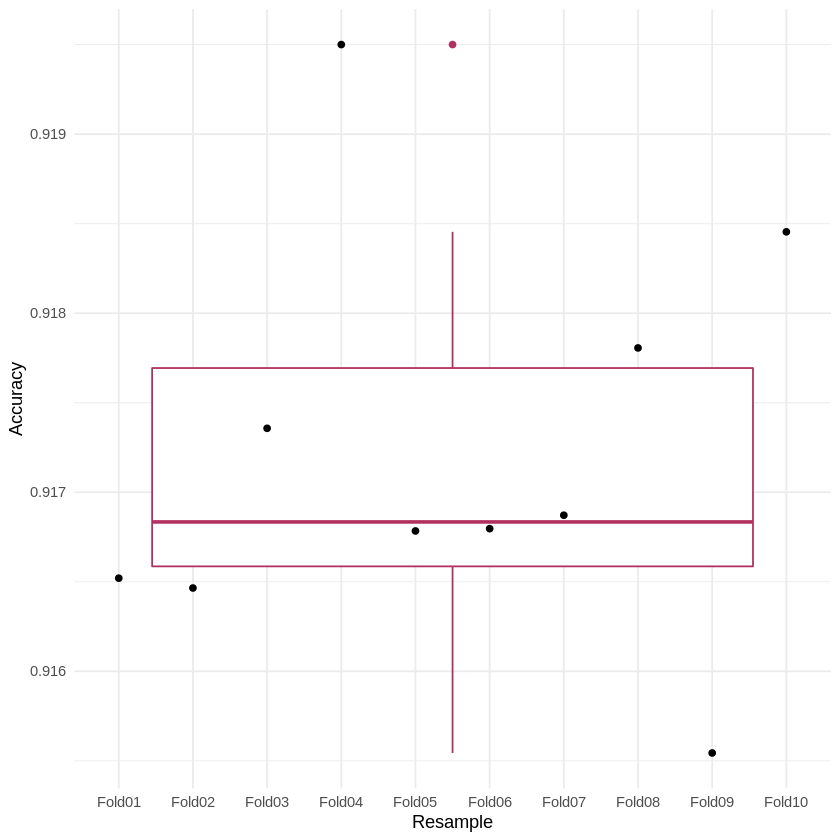

In [ ]:
ggplot(data=eachfold, aes(x=Resample, y=Accuracy, group=1)) +
geom_boxplot(color="maroon") +
geom_point() +
theme_minimal()

# Cross Validation - Final analysis

We can see that each of the folds achieves an accuracy that is not much different from one another. The lowest accuracy is 91.55%, and also in the boxplot, we do not see any outliers. Meaning that our model was performing well across the k-fold cross-validation.

# Conclusion of our Model Comparison

# Model Summary

Conclusion of overall Model Summary and model findings states us that sensitivity is 92.40% with AUC of 94.31% with Model being the better among other tested models.

Conclusion of Random Forest Model 2
Summary of the model findings that high sensitivity from Random Forest is 96.5% compared to the earlier Logistic Regression Model. Also, the model illustrates the  Fallout ratio is also 0.043% which is low compared to earlier model.

In that case we would be relying on the Random Forest Model with the predicted
 variable test_set$Class_pred

#Cost Benefit Analysis - Last part


In [ ]:
head(test_set,3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4,-2.003910,-0.4921503,-0.1061779,1.1808725,-0.6083058,-0.009893897,0.8998398,0.1769393,0.3074534,-1.2710367,⋯,-0.14437336,0.005806913,-0.29884099,-1.9453047,1.2503570,-0.4622513,0.1447729,0.1808461,0.11823760,0
5,-2.003889,-0.5892737,0.5187745,1.0203725,0.2825972,-0.279580953,0.0671053,0.4432982,-0.2139948,0.7380641,⋯,-0.01085478,1.093305712,-0.21426984,0.2311637,-0.3976381,1.0407815,0.5095750,0.6307626,-0.06569869,0
8,-2.003783,-0.3292323,0.8363924,0.7087112,-0.3472298,0.641921467,0.3073870,0.8388583,-3.0606382,0.5536584,⋯,2.62643204,-1.393983694,0.09763643,-1.0761562,-0.8017397,-0.1088257,-2.8110068,-3.1761993,-0.16603694,0


In [ ]:
#Average number of transactions per month that are fraudulent but not detected by the model (FN)
#Total rows (Actual = 1, predict = 0) / 24
FN = nrow(filter(test_set, Class == 1 , Class_pred == 0))/12
FN #2.083

[1] 2.083333

In [ ]:
#Average number of transactions per month detected as fraudulent by the model (TF)
#Total rows (Actual = 1, predict = 1) / 24
TF = nrow(filter(test_set, Class == 1 , Class_pred == 1))/12
TF #6.083

[1] 6.083333